In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/TheCodingRecruiter/Machine-Learning-Salary-Prediction-Model/master/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


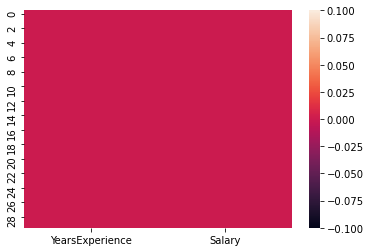

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.show()

In [3]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(30, 2)
(30, 2)


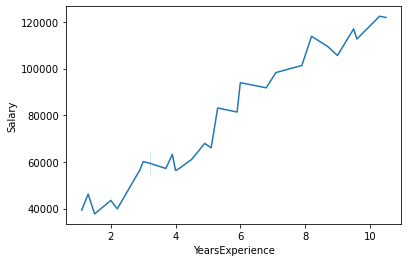

In [7]:
sns.lineplot(x=df["YearsExperience"],y=df["Salary"],data=df)
plt.show()

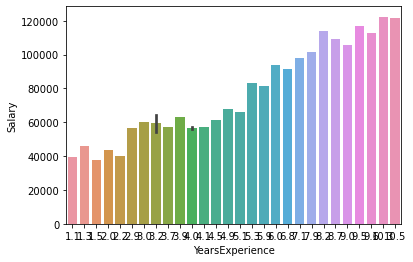

In [8]:
sns.barplot(x=df["YearsExperience"],y=df["Salary"],data=df)
plt.show()

In [9]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [13]:
x=df[["YearsExperience"]]
y=df[["Salary"]]

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.9024461774180499
r2_score corresponding to random state:  43  is:  0.8688045158887868
r2_score corresponding to random state:  44  is:  0.9349511170439279
r2_score corresponding to random state:  45  is:  0.9250487875802144
r2_score corresponding to random state:  46  is:  0.9789129767378081
r2_score corresponding to random state:  47  is:  0.98399193890564
r2_score corresponding to random state:  48  is:  0.980277279178695
r2_score corresponding to random state:  49  is:  0.9497670285223544
r2_score corresponding to random state:  50  is:  0.882467963516984
r2_score corresponding to random state:  51  is:  0.9608624689052039
r2_score corresponding to random state:  52  is:  0.9743646706957548
r2_score corresponding to random state:  53  is:  0.9501154883629507
r2_score corresponding to random state:  54  is:  0.949272996884066
r2_score corresponding to random state:  55  is:  0.8924137091604103
r2_score corresponding to random state:

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y, cv=5,scoring="r2").mean()

-0.0533642768450965

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 50,test_size=0.20)
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))


r2 score is:  0.882467963516984
RMSE is :  7247.2389817637395
